In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0513final_train_lite.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add( tf.keras.layers.Dense(units=128, input_shape=[40],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [10]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [11]:
model.add(tf.keras.layers.Dense(units=64,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [12]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [14]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [15]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_history = model.fit(new_all_feature , train_y, validation_split = 0.1,
                          epochs = 50, batch_size = 15, verbose=2)   #一層500  三層1500

Train on 171 samples, validate on 20 samples
Epoch 1/50
 - 0s - loss: 30.4972 - acc: 0.3158 - val_loss: 28.4775 - val_acc: 0.4000
Epoch 2/50
 - 0s - loss: 27.6594 - acc: 0.3918 - val_loss: 25.9856 - val_acc: 0.4000
Epoch 3/50
 - 0s - loss: 25.2172 - acc: 0.3509 - val_loss: 23.7105 - val_acc: 0.4500
Epoch 4/50
 - 0s - loss: 22.9150 - acc: 0.4912 - val_loss: 21.5976 - val_acc: 0.4500
Epoch 5/50
 - 0s - loss: 20.8268 - acc: 0.4795 - val_loss: 19.6689 - val_acc: 0.5000
Epoch 6/50
 - 0s - loss: 18.8443 - acc: 0.5263 - val_loss: 17.9316 - val_acc: 0.5000
Epoch 7/50
 - 0s - loss: 17.2208 - acc: 0.5439 - val_loss: 16.3436 - val_acc: 0.5500
Epoch 8/50
 - 0s - loss: 15.6436 - acc: 0.5439 - val_loss: 14.9075 - val_acc: 0.5000
Epoch 9/50
 - 0s - loss: 14.2626 - acc: 0.5029 - val_loss: 13.5837 - val_acc: 0.4500
Epoch 10/50
 - 0s - loss: 12.9213 - acc: 0.5965 - val_loss: 12.3700 - val_acc: 0.5000
Epoch 11/50
 - 0s - loss: 11.7240 - acc: 0.6023 - val_loss: 11.2698 - val_acc: 0.6000
Epoch 12/50
 - 0s 

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

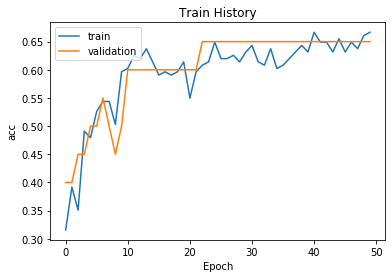

In [18]:
show_train_history(train_history,'acc','val_acc')

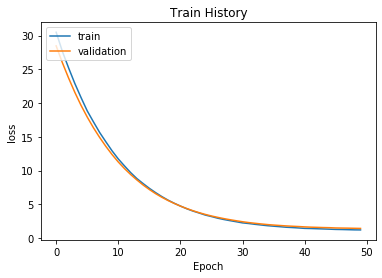

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
#from keras.models import load_model
#model.save('model0513_V.h5')

In [21]:
#import tensorflowjs as tfjs

In [22]:
#tfjs.converters.save_keras_model(model,'./model_file')

In [23]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)        #tf.lite這個要 tensorflow2.0才能裝 
#tflite_model = converter.convert()
#open("ann.tflite" , "wb").write(tflite_model)

AttributeError: module 'tensorflow' has no attribute 'lite'